# 환경 설정 

1. python : 3.9.7
2. opencv-python : 4.5.5.62
3. dlib : 19.22.1

In [5]:
!python --version
!pip list |findstr opencv

Python 3.9.7
opencv-python       4.5.5.62


In [6]:
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [10]:
!pip install opencv-python
!pip install opencv-contrib-python==4.5.2.52 --user
!pip install opencv-python-headless==4.5.2.52 --user

In [3]:
!pip install numpy
!pip install cmake
!pip install dlib

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


  Using cached cmake-3.22.1-py2.py3-none-win_amd64.whl (38.1 MB)
  Using cached dlib-19.22.1-cp39-cp39-win_amd64.whl


In [8]:
!pip install matplotlib

In [11]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# Step1. 고양이 수염 이미지 다운로드하기 

In [15]:
!pip install wget


오른쪽 url에서 고양이 수염 이미지 다운로드 : "https://cdn-icons-png.flaticon.com/512/24/24674.png"
내 얼굴 사진은 my_face.jpg, my_face2.jpg로 저장함.

# Step 2. 얼굴 검출 & 랜드마크 검출 하기


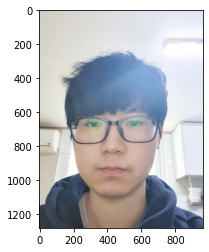

In [40]:
# 내 얼굴 사진 확인하기 
my_image_path = './my_face2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

#rgb로 전황
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [41]:
#얼굴 검출하기 
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(171, 542) (726, 1096)]]


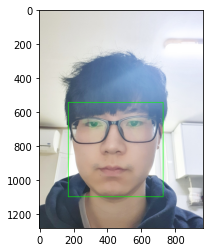

In [42]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 랜드마크 검출하기 

"http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2" 에서 랜트마클 모델 다운로드 

In [43]:


model_path = "./shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [44]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


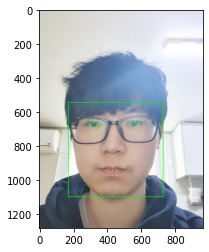

In [45]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 3 스티커 적용 위치 확인하기

512 512 3


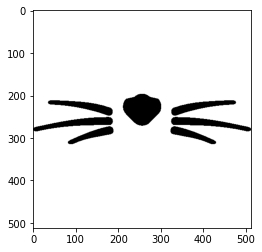

In [197]:

# 스티커의 모양은 고양이 수염인데 아래와 같다. 
my_image_path2 = './cat-whiskers.png'
img_bgr2 = cv2.imread(my_image_path2)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr2.copy()      # 출력용 이미지를 따로 보관합니다
img_h, img_w, img_c = img_bgr2.shape
print(img_h, img_w, img_c)
plt.imshow(img_show)
plt.show()

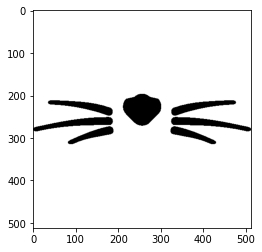

In [198]:

#rgb로 전황
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

이를 화면에 적용시키기 위해선 고양이 코의 위치를 사진 속 하단 코(콧구멍쪽)에 위치 시켜야한다.

x은 이미지의 중점이지만, y값은 이미지 크지의 절반 만큼 늘리면 잘 위치될 것으로 보인다.   
코에 위치 시키기 위해선 이미지 최하단 좌표 y와 코의 위치를 일치 시켜야하기 때문이다. 

스티커의 크기는 얼굴 너비와 일치시키면 될 것으로 보인다. 


In [199]:
# 좌표 확인 

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8]) # 코 하단의 index는 33 입니다
    x = landmark[33][0]
    y = landmark[33][1] + img_h//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(432, 1092)
(x,y) : (428,1085)
(w,h) : (463,463)


In [200]:
sticker_path = './cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)


(463, 463, 3)


In [201]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (197,622)
(x,y) : (197,622)


# Step 4 스티커 적용하기

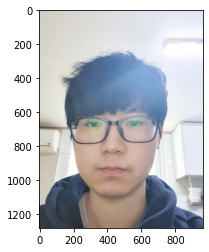

In [202]:
my_image_path = './my_face2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

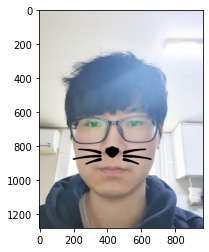

In [203]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

보다시피 코에 이쁘게 잘 위치되었다. 

# Step 5. 문제점 찾아보기

다른 사진 my_face3.jpg를 준비하였다. 
해당 사진은 측면으로 고개를 꺾은 사진이다. 

기존 코드 대로면 이미지의 회전 없이 그냥 정면으로 필터가 씌워질 것이다.
따라서 고개가 기울인 만큼 이미지도 회전 시켜야한다. 


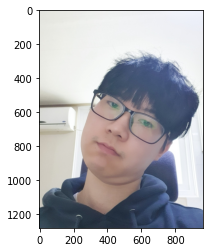

In [242]:
my_image_path2 = './my_face3.jpg'
img_bgr2 = cv2.imread(my_image_path2)    # OpenCV로 이미지를 불러옵니다
img_show3 = img_bgr2.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
plt.show()

rectangles[[(245, 502) (707, 965)]]


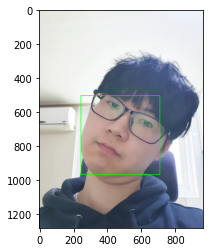

In [243]:
#얼굴 검출하기 
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)

print(dlib_rects2)   

for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show3, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

얼굴 중심선을 이으면 직선이 나오고 이것과 얼굴 감지 bounding box의 하단 선과의 기울기가 고개를 기울인 각도이다. 

이 각도만큼 getRotationMatrix2D를 이용하여 적용하면 될 것이다. 

In [244]:
list_landmarks2 = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb2, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks2.append(list_points)

print(len(list_landmarks2[0]))



68


In [278]:
import math

for dlib_rect, landmark in zip(dlib_rects2, list_landmarks2):
    print (landmark[8]) # 코 하단의 index는 33 입니다
    x = landmark[33][0]
    y = landmark[33][1] + img_h//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
    # 기울기 구하기 
    # 코와 턱선을 이어본다. 
    x1 = landmark[8][0]
    y1 = landmark[8][1]
    x2 = x
    y2 = y
    m = (y2-y1)/(x2 - x1) # == tan(theta)
    rad = math.atan2(y2-y1,x2-x1)
    print(rad)
   



(397, 962)
(x,y) : (433,998)
(w,h) : (463,463)
0.7853981633974483


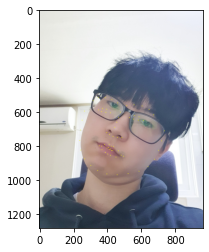

In [279]:
for landmark in list_landmarks2:
    for point in landmark:
        cv2.circle(img_show3, point, 2, (0, 255, 255), -1)

img_show_rgb2 = cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

512 512 3


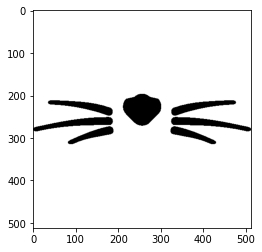

In [316]:
# 스티커의 모양은 고양이 수염인데 아래와 같다. 
my_image_path2 = './cat-whiskers.png'
img_bgr2 = cv2.imread(my_image_path2)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr2.copy()      # 출력용 이미지를 따로 보관합니다
img_h, img_w, img_c = img_bgr2.shape
print(img_h, img_w, img_c)
plt.imshow(img_show)
plt.show()

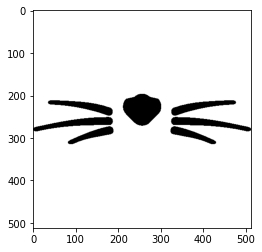

In [317]:
#rgb로 전황
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [318]:
sticker_path = './cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(463, 463, 3)


45.0


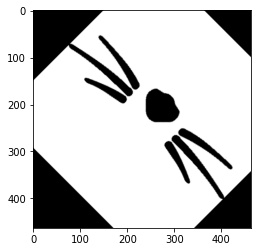

In [319]:
#스티커 회전
theta = (rad*180)/math.pi
rotate_img = cv2.getRotationMatrix2D((img_h / 2, img_w / 2), 360 - theta, 1)
print(theta)
new_h, new_w = img_h, img_w
result = cv2.warpAffine(img_sticker, rotate_img, (w, h))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

이미지가 회전된 모습을 확인하였다. 

이제 해당 이미지를 입혀주면 된다. 

In [320]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    result = result[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    result = result[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (202,535)
(x,y) : (202,535)


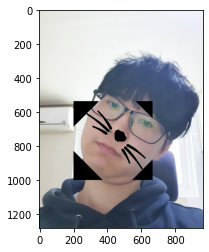

In [321]:
my_image_path = './my_face3.jpg'
img_bgr3 = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show3 = img_bgr3.copy()      # 출력용 이미지를 따로 보관합니다

sticker_area2 = img_bgr3[refined_y:refined_y +result.shape[0], refined_x:refined_x+result.shape[1]]
img_bgr3[refined_y:refined_y +result.shape[0], refined_x:refined_x+result.shape[1]] = \
    np.where(result==255,sticker_area2,result).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB))
plt.show()

보다시피 고개를 돌린만큼 어느정도 보정이 된 것을 확인할 수 있다. 

이제 문제는 나머지 돌리면서 생겨난 검정 부분이다. 


1. 이는 빈 공간을 0으로 채우면서 생겨난 문제인데. 빈 공간을 255로 채우면 해결될 것이다.

: 간단한 방법은 각 경계 좌표의 회전값 바깥만 채우는 것이 맞을 것이다. 


2. 또 다른 방법은 사용하는 필터 이미지의 특성을 활용하면 된다.

: 주어진 고양이 수염 이미지는 255와 0으로만 이루어진 png 파일이다. 따라서 고양이 수염에 해당하는 영역을 0 -> 1로 수정하고, 이미지를 회전한다. 그 다음 0으로 채워진 빈 공간을 모두 255로 바꾸고 1로 수정했던 원래 이미지 셀을 다시 0으로 채운다.  

3. 양 옆 테두리부터 검정색이면 전부 255로 차근차근 바꾸되, 흰색을 만나면 작동을 멈추는 방식 

2번 방법이 로직상 더 간단할 거 같지만 시간 복잡도는 3번이 더 나을 것이다. 2번의 경우 시간 복잡도는 O(n^3), 3번은 O(n)



In [322]:
print(type(result))
print(result[0][0])
print(result[0][0] == [0, 0, 0])
np.set_printoptions(threshold=np.inf)

<class 'numpy.ndarray'>
[0 0 0]
[ True  True  True]


45.0


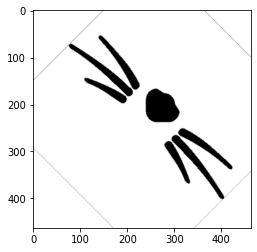

In [323]:
# 변환 전 이미지 데이터 재구성
for i in range(img_sticker.shape[0]) :
    for j in range(img_sticker.shape[1]):
        if np.all(img_sticker[i][j] == [0,0,0]):
            img_sticker[i][j] = [1, 1, 1]
            
plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB))

#스티커 회전
theta = (rad*180)/math.pi
rotate_img = cv2.getRotationMatrix2D((img_h / 2, img_w / 2), 360 - theta, 1)
print(theta)
new_h, new_w = img_h, img_w
result = cv2.warpAffine(img_sticker, rotate_img, (w, h))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))


# 변환 후 이미지 데이터 재구성
for i in range(result.shape[0]) : # 빈 공간 채우기
    for j in range(result.shape[1]):
        if np.all(result[i][j] == [0,0,0]):
            result[i][j] = [255, 255, 255]

for i in range(result.shape[0]) : # 기존 이미지 검정으로 바꾸기
    for j in range(result.shape[1]):
        if np.all(result[i][j] == [1,1,1]):
            result[i][j] = [0, 0, 0]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

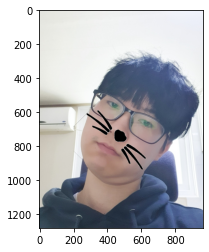

In [324]:
my_image_path = './my_face3.jpg'
img_bgr3 = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show3 = img_bgr3.copy()      # 출력용 이미지를 따로 보관합니다

sticker_area2 = img_bgr3[refined_y:refined_y +result.shape[0], refined_x:refined_x+result.shape[1]]
img_bgr3[refined_y:refined_y +result.shape[0], refined_x:refined_x+result.shape[1]] = \
    np.where(result==255,sticker_area2,result).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB))
plt.show()

테두리선을 제외하고 깔끔하게 여백이 사라졌다.

# 마무리


해당 프로젝트를 진행하면서 발생한 오류는 아래 링크에서 확인할 수 있다. 
https://citrine-cashew-534.notion.site/1-11-d669443296354842aeba613b58a9f18a

환경 설정에서 조금 애먹었는데, 환경 버전의 호환성을 잘 맞추는 것이 중요하다는 것을 다시 확인했다. 

